In [20]:
import pandas as pd
import numpy as np
import math
import time
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [21]:
df = pd.read_csv('CardTransactions.csv')
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


                                distance_from_home  \
distance_from_home                        1.000000   
distance_from_last_transaction            0.000193   
ratio_to_median_purchase_price           -0.001374   
repeat_retailer                           0.143124   
used_chip                                -0.000697   
used_pin_number                          -0.001622   
online_order                             -0.001301   
fraud                                     0.187571   

                                distance_from_last_transaction  \
distance_from_home                                    0.000193   
distance_from_last_transaction                        1.000000   
ratio_to_median_purchase_price                        0.001013   
repeat_retailer                                      -0.000928   
used_chip                                             0.002055   
used_pin_number                                      -0.000899   
online_order                                       

<AxesSubplot:>

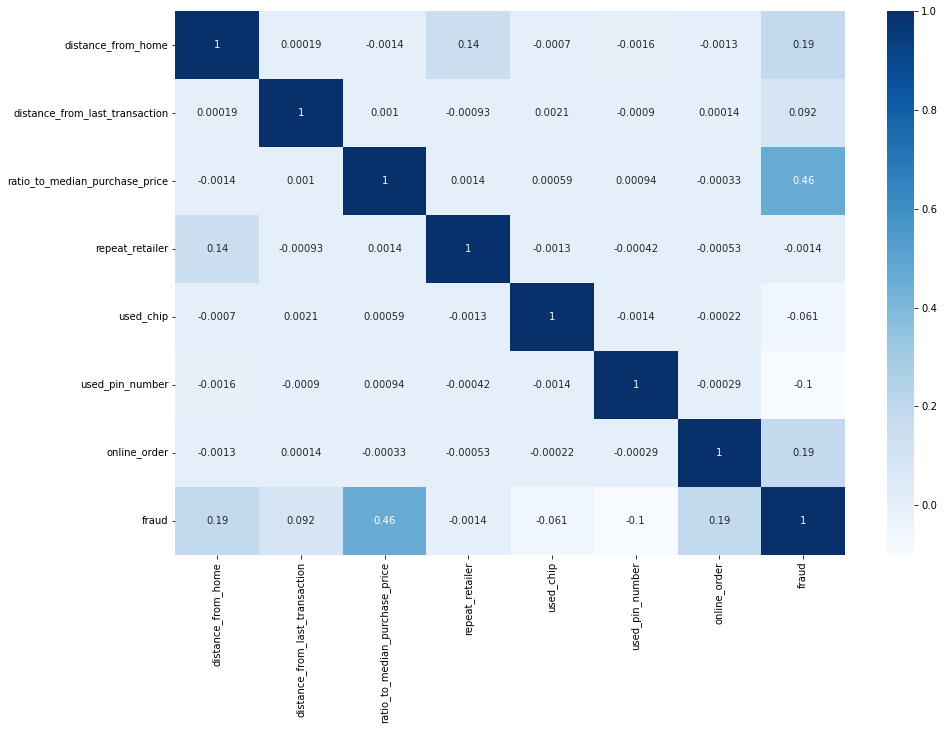

In [22]:
cor = df.corr()
print(cor)
plt.figure(figsize= (15,10))
sb.heatmap(cor, annot=True, cmap="Blues")

<AxesSubplot:xlabel='online_order', ylabel='fraud'>

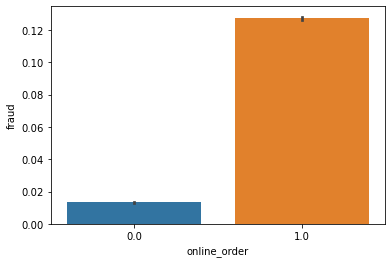

In [23]:
sb.barplot(data=df, x='online_order', y='fraud')

<AxesSubplot:xlabel='used_pin_number', ylabel='fraud'>

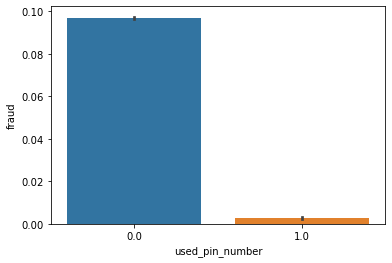

In [24]:
sb.barplot(data=df, x='used_pin_number', y='fraud')

<AxesSubplot:xlabel='used_chip', ylabel='fraud'>

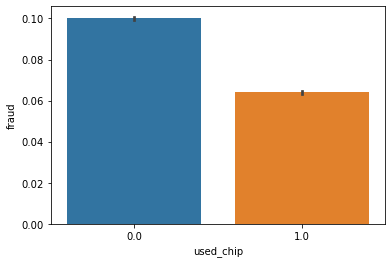

In [25]:
sb.barplot(data=df, x='used_chip', y='fraud')

<AxesSubplot:xlabel='repeat_retailer', ylabel='fraud'>

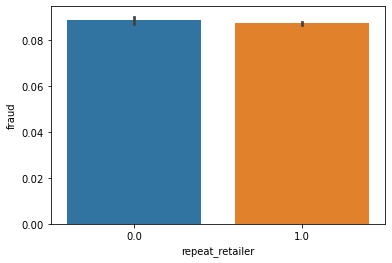

In [26]:
sb.barplot(data=df, x='repeat_retailer', y='fraud')

In [27]:
duplicates = df.duplicated()
if duplicates.any():
    print('Duplicates exist in the DataFrame')
else:
    print('No duplicates in the DataFrame')

No duplicates in the DataFrame


In [28]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [29]:
df.drop(["distance_from_home", "repeat_retailer", "used_chip"], axis=1, inplace=True)

In [33]:

def testTrainSplit(df):
    length = len(df.index)
    splitLimit = int(length * 0.5)
    X_train = df[0: splitLimit]
    y_train = X_train['fraud']
    X_test = df[splitLimit + 1: length]
    y_test = X_test['fraud']
    return X_train, y_train, X_test, y_test

In [34]:
X_train, y_train, X_test, y_test = testTrainSplit(df)

In [35]:

class KNN:
    def __init__(self, k=3):
        self.k = k

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            distances = []
            for j in range(len(self.X_train)):
                distance = self.euclidean_distance(X[i], self.X_train[j])
                distances.append((distance, self.y_train[j]))
            distances.sort()
            k_nearest_neighbors = [distance[1] for distance in distances[:self.k]]
            most_common = Counter(k_nearest_neighbors).most_common(1)
            predictions.append(most_common[0][0])
        return predictions


In [38]:
# Example usaaage
"""X_train = np.array([[1, 2], [2, 1], [2, 3], [3, 2]])
y_train = np.array([0, 0, 1, 1])
X_test = np.array([[1, 1], [3, 3]])"""

knn = KNN(k=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print(predictions)  # Output: [0, 1]


KeyError: 0